# SDIS 91 challenge

In [175]:
import rampwf as rw
import warnings

warnings.filterwarnings("ignore")
import os
import h5py
import numpy as np
import pandas as pd
from pathlib import Path


TODO:
- [ ] columns explanation for communes features


## Data exploration


In [176]:
def create_idx(
    df: pd.DataFrame, col_year: str, col_week: str, col_insee: str
) -> pd.DataFrame:
    """Create the 'idx' column that serve as a unique indenfifier for SDIS91
    project in the form of the integer YYYYWWWNNNNN where YYYY is the year,
    WW the number of the week and NNNNN is the code insee of the commune.

    args:
    - df: the orignal dataframe that will be modified
    - col_year: the name of the column of df that contains the year as int
    - col_week: the name of the column of df that contains the week number as int
    - col_insee: the name of the column of df that contains the insee code as int
    """
    df["idx"] = (
        df[col_year] * 10_000_000 + df[col_week] * 100_000 + df[col_insee]
    ).astype("int64")
    return df

### Données INSEE annuelles

In [177]:
yearly_communes = pd.read_csv(Path("data", "91-communes-features.csv"))
yearly_communes["code_insee"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: code_insee
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [178]:
print(f"Contains data for years {yearly_communes['annee'].unique()}")
print(
    f"for {yearly_communes['code_insee'].nunique()}-{yearly_communes['commune_nom'].nunique()} communes of dept {yearly_communes['dept'].unique()}"
)
com_yearly_insee = yearly_communes["code_insee"].unique()
print(com_yearly_insee)

Contains data for years [2010 2011 2012 2013 2014 2015 2016 2017 2018]
for 126-126 communes of dept [91]
[91016 91017 91021 91027 91038 91044 91045 91064 91085 91086 91093 91095
 91097 91099 91103 91105 91106 91111 91114 91115 91122 91129 91130 91135
 91136 91159 91161 91174 91175 91179 91182 91191 91200 91201 91204 91207
 91215 91216 91223 91225 91226 91228 91232 91235 91240 91243 91249 91272
 91274 91275 91286 91293 91312 91315 91318 91326 91330 91332 91333 91338
 91339 91340 91345 91347 91359 91363 91376 91377 91386 91390 91405 91411
 91421 91425 91432 91433 91434 91435 91457 91458 91461 91469 91471 91477
 91479 91494 91511 91514 91521 91525 91533 91534 91538 91540 91549 91552
 91553 91570 91573 91577 91579 91587 91589 91593 91599 91600 91602 91617
 91630 91631 91634 91635 91639 91645 91648 91649 91657 91659 91661 91665
 91667 91685 91687 91689 91691 91692]


In [ ]:
yearly_communes = yearly_communes.drop(
    columns=["code_postal", "dept", "region"]
)
yearly_communes["YYYYNNNNN"] = (
    yearly_communes["annee"] * 100_000 + yearly_communes["code_insee"]
)
yearly_communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 133 entries, annee to YYYYNNNNN
dtypes: float64(117), int64(15), object(1)
memory usage: 1.2+ MB


### Données INSEE variables

In [180]:
# Chargement des données par semaine pour toutes les communes du département de 2010 à 2018
# 2010-2014, uniquement des données de calendrier
variable_communes = pd.read_csv(Path("data", "91-variability-features.csv"))
variable_communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cal_annee                    51295 non-null  int64  
 1   cal_semaine                  51295 non-null  int64  
 2   cal_semaine_jour_ferie       51295 non-null  int64  
 3   cal_semaine_ramadan          51295 non-null  int64  
 4   cal_semaine_soldes           51295 non-null  int64  
 5   cal_semaine_summer           51295 non-null  int64  
 6   cal_semaine_vacances         51295 non-null  int64  
 7   diharee_nbr                  50890 non-null  float64
 8   diharee_nbr_pour_100k_hab    50890 non-null  float64
 9   grippe_nbr                   50890 non-null  float64
 10  grippe_nbr_pour_100k_hab     50890 non-null  float64
 11  meteo_avg_day_duration       51138 non-null  float64
 12  meteo_avg_humidity           51138 non-null  float64
 13  meteo_avg_moon  

In [181]:
# Split calendar data
cal_data = variable_communes[
    [
        col_name
        for col_name in variable_communes.columns
        if col_name.startswith("cal_")
    ]
]
cal_data = cal_data.drop_duplicates()
cal_data["YYYYWW"] = cal_data["cal_annee"] * 100 + cal_data["cal_semaine"]
cal_data

,cal_annee,cal_semaine,cal_semaine_jour_ferie,cal_semaine_ramadan,cal_semaine_soldes,cal_semaine_summer,cal_semaine_vacances,YYYYWW
0,2010,1,0,0,0,0,0,201001
1,2010,2,0,0,0,0,0,201002
2,2010,3,0,0,0,0,0,201003
3,2010,4,0,0,0,0,0,201004
4,2010,5,0,0,0,0,1,201005
...,...,...,...,...,...,...,...,...
50315,2018,48,0,0,0,0,0,201848
50511,2018,49,0,0,0,0,0,201849
50707,2018,50,0,0,0,0,0,201850
50903,2018,51,0,0,0,0,0,201851


In [182]:
# Split the variable data
var_data = variable_communes.drop(
    columns=[
        col_name
        for col_name in variable_communes.columns
        if col_name.startswith("cal_semaine_")
    ]
)
# var_data = var_data.dropna(how="all")
var_data

,cal_annee,cal_semaine,diharee_nbr,diharee_nbr_pour_100k_hab,grippe_nbr,grippe_nbr_pour_100k_hab,meteo_avg_day_duration,meteo_avg_humidity,meteo_avg_moon,meteo_avg_precip,...,prev_avg_precip,prev_avg_pression,prev_avg_temp_max,prev_avg_temp_min,prev_avg_wind_speed,tx_diarrhee_par_hab,tx_grippe_par_hab,tx_varicelle_par_hab,varicelle_nbr,varicelle_nbr_pour_100k_hab
0,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,2018,52,14938.0,123.0,48723.0,402.0,499.1,0.869,0.3,0.052,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0
51291,2018,52,14938.0,123.0,48723.0,402.0,499.1,0.869,0.3,0.052,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0
51292,2018,52,14938.0,123.0,48723.0,402.0,499.1,0.869,0.3,0.052,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0
51293,2018,52,14938.0,123.0,48723.0,402.0,499.1,0.869,0.3,0.052,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0


In [183]:
print(f"Contains data for years {variable_communes['cal_annee'].unique()}")
print(
    f"for {variable_communes['pollution_code_insee'].nunique()} communes of dept"
)
com_var_insee = (
    variable_communes["pollution_code_insee"].dropna().unique().astype(int)
)
print(com_var_insee)

Contains data for years [2010 2011 2012 2013 2014 2015 2016 2017 2018]
for 196 communes of dept
[91001 91016 91017 91021 91022 91027 91035 91037 91038 91041 91044 91045
 91047 91064 91067 91069 91075 91079 91080 91081 91085 91086 91093 91095
 91097 91098 91099 91100 91103 91105 91106 91109 91111 91112 91114 91115
 91121 91122 91129 91130 91131 91132 91135 91136 91137 91145 91148 91156
 91159 91161 91174 91175 91179 91180 91182 91184 91186 91191 91195 91198
 91200 91201 91204 91207 91215 91216 91222 91223 91225 91226 91228 91232
 91235 91240 91243 91244 91247 91248 91249 91272 91273 91274 91275 91284
 91286 91292 91293 91294 91312 91315 91318 91319 91326 91330 91332 91333
 91338 91339 91340 91345 91347 91359 91363 91374 91376 91377 91378 91386
 91390 91393 91399 91405 91408 91411 91412 91414 91421 91425 91432 91433
 91434 91435 91441 91457 91458 91461 91463 91468 91469 91471 91473 91477
 91479 91482 91494 91495 91507 91508 91511 91514 91519 91521 91525 91526
 91533 91534 91538 91540 915

In [ ]:
# Drop emtpy insee
var_data = var_data[~var_data["pollution_code_insee"].isna()]
# creation of idx column
var_data = create_idx(
    var_data, "cal_annee", "cal_semaine", "pollution_code_insee"
)
# var_data["idx"] = (
#     var_data["cal_annee"] * 10_000_000
#     + var_data["cal_semaine"] * 100_000
#     + var_data["pollution_code_insee"]
# ).astype("Int64")
var_data["idx"]


209      20140191001
210      20140191016
211      20140191017
212      20140191021
213      20140191022
            ...     
51290    20185291685
51291    20185291687
51292    20185291689
51293    20185291691
51294    20185291692
Name: idx, Length: 51086, dtype: int64

In [185]:
# Expected data rows
# Add empty rows for weeks of communes without interventions
print(f"Expect {(3 * 53 + 6 * 52) * 196} rows")
# Year 2010, 2015 and 2016 have 53 weeks
# Create expected index
all_years = np.arange(2010, 2019)
all_weeks = np.array(
    [
        f"{year}{week:02d}"
        for year in all_years
        for week in range(1, 54 if year in [2010, 2015, 2016] else 53)
    ]
).astype(int)
print(f"{all_weeks.shape=}")
all_weeks_communes = (all_weeks[:, None] * 100_000 + com_var_insee).flatten()

print(f"{all_weeks_communes.shape=}")
df_index = pd.DataFrame(all_weeks_communes, columns=["idx"])
df_index["YYYYWW"] = df_index["idx"] // 100_000
df_index

Expect 92316 rows
all_weeks.shape=(471,)
all_weeks_communes.shape=(92316,)


,idx,YYYYWW
0,20100191001,201001
1,20100191016,201001
2,20100191017,201001
3,20100191021,201001
4,20100191022,201001
...,...,...
92311,20185291685,201852
92312,20185291687,201852
92313,20185291689,201852
92314,20185291691,201852


In [ ]:
# Get the calendar data
X_df = pd.merge(df_index, cal_data, how="left", on="YYYYWW").drop(
    columns=["YYYYWW"]
)
X_df.shape

(92316, 8)

In [ ]:
# merge with df_index
X_df = pd.merge(
    X_df,
    var_data.drop(columns=["cal_annee", "cal_semaine"]),
    on="idx",
    how="left",
)
print(X_df.shape)
X_df

(92316, 41)


,idx,cal_annee,cal_semaine,cal_semaine_jour_ferie,cal_semaine_ramadan,cal_semaine_soldes,cal_semaine_summer,cal_semaine_vacances,diharee_nbr,diharee_nbr_pour_100k_hab,...,prev_avg_precip,prev_avg_pression,prev_avg_temp_max,prev_avg_temp_min,prev_avg_wind_speed,tx_diarrhee_par_hab,tx_grippe_par_hab,tx_varicelle_par_hab,varicelle_nbr,varicelle_nbr_pour_100k_hab
0,20100191001,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20100191016,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20100191017,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20100191021,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20100191022,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92311,20185291685,2018,52,2,0,0,0,0,14938.0,123.0,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0
92312,20185291687,2018,52,2,0,0,0,0,14938.0,123.0,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0
92313,20185291689,2018,52,2,0,0,0,0,14938.0,123.0,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0
92314,20185291691,2018,52,2,0,0,0,0,14938.0,123.0,...,0.052,1006.784,8.117,3.311,2.885,0.00123,0.00402,0.00003,368.0,3.0


In [ ]:
# merge with the yearly data
# Need the yealy idx
X_df["YYYYNNNNN"] = X_df["cal_annee"] * 100_000 + X_df["cal_semaine"]
X_df = pd.merge(X_df, yearly_communes, how="left", on="YYYYNNNNN").drop(
    columns=["YYYYNNNNN"]
)
print(X_df.shape)
X_df

(92316, 173)


,idx,cal_annee,cal_semaine,cal_semaine_jour_ferie,cal_semaine_ramadan,cal_semaine_soldes,cal_semaine_summer,cal_semaine_vacances,diharee_nbr,diharee_nbr_pour_100k_hab,...,caf_nb_allocataires_prop,caf_nb_alloc_dep_50_prop,caf_nb_alloc_dep_100_prop,pop_tx_natalite,pop_tx_mortalite,pop_tx_accroissement,pop_median_up,superficie,densite,commune_categ
0,20100191001,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20100191016,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20100191017,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20100191021,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20100191022,2010,1,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92311,20185291685,2018,52,2,0,0,0,0,14938.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92312,20185291687,2018,52,2,0,0,0,0,14938.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92313,20185291689,2018,52,2,0,0,0,0,14938.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92314,20185291691,2018,52,2,0,0,0,0,14938.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92316 entries, 0 to 92315
Columns: 173 entries, idx to commune_categ
dtypes: float64(163), int64(8), object(2)
memory usage: 121.8+ MB


## Inters


In [190]:
inter_train = pd.read_csv(
    Path("data", "interventions-hebdo-2010-2017.csv"), sep=";"
)
inter_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455794 entries, 0 to 455793
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ope_code_insee   405041 non-null  float64
 1   nb_ope           405041 non-null  float64
 2   ope_annee        405041 non-null  float64
 3   ope_semaine      405041 non-null  float64
 4   ope_categorie    405041 non-null  object 
 5   ope_code_postal  405041 non-null  float64
 6   ope_nom_commune  405041 non-null  object 
dtypes: float64(5), object(2)
memory usage: 24.3+ MB


In [218]:
# drop the na code insee
inter_train = inter_train[~inter_train["ope_code_insee"].isna()]
print(f"Contains data for years {inter_train['ope_annee'].unique()}")
print(f"for {inter_train['ope_code_insee'].nunique()} communes of dept")
com_ope_insee = inter_train["ope_code_insee"].dropna().unique().astype(int)
print(com_ope_insee)

Contains data for years [2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.]
for 196 communes of dept
[91001 91016 91017 91021 91022 91027 91035 91037 91038 91041 91044 91045
 91047 91064 91067 91069 91075 91079 91080 91081 91085 91086 91093 91095
 91097 91098 91099 91100 91103 91105 91106 91109 91111 91112 91114 91115
 91121 91122 91129 91130 91131 91132 91135 91136 91137 91148 91156 91159
 91161 91174 91175 91179 91180 91182 91186 91191 91195 91198 91200 91201
 91204 91207 91215 91216 91222 91223 91225 91226 91228 91232 91235 91243
 91244 91247 91248 91249 91272 91273 91274 91275 91284 91286 91292 91293
 91294 91312 91315 91318 91319 91326 91330 91332 91333 91338 91339 91340
 91345 91347 91359 91363 91374 91376 91377 91378 91386 91390 91393 91399
 91405 91408 91411 91412 91414 91421 91425 91432 91433 91434 91435 91441
 91457 91458 91461 91463 91468 91469 91471 91473 91477 91479 91482 91494
 91495 91507 91508 91511 91514 91519 91521 91525 91526 91533 91534 91540
 91544 91546 91547 91549 

In [219]:
inter_test = pd.read_csv(
    Path("data", "interventions-sdis91.csv"), encoding="ISO-8859-1", sep=";"
)
inter_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79481 entries, 0 to 79480
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nb_ope           79481 non-null  int64 
 1   ope_annee        79481 non-null  int64 
 2   ope_code_insee   79481 non-null  int64 
 3   ope_nom_commune  79481 non-null  object
 4   ope_semaine      79481 non-null  int64 
 5   ope_categorie    60321 non-null  object
dtypes: int64(4), object(2)
memory usage: 3.6+ MB


In [220]:
print(f"Contains data for years {inter_test['ope_annee'].unique()}")
print(f"for {inter_test['ope_code_insee'].nunique()} communes of dept")
# filter to keep only 2018
inter_test = inter_test[inter_test["ope_annee"] == 2018]
com_opet_insee = inter_test["ope_code_insee"].dropna().unique().astype("int64")
print(com_opet_insee)
print(inter_test.shape)

Contains data for years [2018 2019 2020 2021 2022 2023]
for 197 communes of dept
[91001 91016 91017 91021 91022 91027 91035 91037 91038 91041 91044 91045
 91047 91064 91067 91069 91075 91079 91080 91081 91085 91086 91093 91095
 91097 91098 91099 91100 91103 91105 91106 91109 91111 91112 91114 91115
 91121 91122 91129 91130 91131 91132 91135 91136 91137 91145 91148 91156
 91159 91377 91161 91613 91174 91175 91180 91182 91184 91186 91191 91195
 91198 91200 91201 91521 91204 91207 91215 91216 91222 91223 91225 91226
 91228 91235 91240 91243 91244 91249 91272 91273 91274 91275 91286 91292
 91293 91294 91312 91315 91318 91319 91326 91232 91247 91248 91457 91665
 91330 91179 91494 91630 91284 91411 91692 91332 91333 91691 91338 91339
 91340 91345 91347 91359 91363 91374 91376 91378 91386 91390 91393 91399
 91405 91408 91412 91414 91421 91425 91432 91433 91434 91435 91441 91458
 91461 91463 91468 91469 91471 91473 91477 91479 91482 91495 91507 91508
 91511 91514 91519 91525 91526 91533 91534 

In [221]:
set(com_opet_insee) - set(com_ope_insee)

{np.int64(91310)}

In [222]:
yearly_communes[yearly_communes["code_insee"] == 91310].shape

(0, 133)

In [223]:
# TOURY is not in Essonne
inter_test[inter_test["ope_code_insee"] == 91310]

,nb_ope,ope_annee,ope_code_insee,ope_nom_commune,ope_semaine,ope_categorie
14218,1,2018,91310,TOURY,26,ACCI


In [226]:
# Drop the commune 91310 not in Essone
inter_test = inter_test[inter_test["ope_code_insee"] != 91310]

# Merge the interventions for processing
interventions = pd.concat(
    [inter_train.drop(columns=["ope_code_postal"]), inter_test], axis=0
).astype(
    {
        col: "int64"
        for col in inter_test.columns
        if col not in ["ope_categorie", "ope_nom_commune"]
    }
)
interventions.shape

(421138, 6)

In [227]:
interventions

,ope_code_insee,nb_ope,ope_annee,ope_semaine,ope_categorie,ope_nom_commune
0,91001,0,2010,1,INCN,ABBEVILLE LA RIVIERE
1,91016,0,2010,1,INCN,ANGERVILLE
2,91017,0,2010,1,INCN,ANGERVILLIERS
3,91021,0,2010,1,INCN,ARPAJON
4,91022,0,2010,1,INCN,ARRANCOURT
...,...,...,...,...,...,...
16093,91691,1,2018,36,INCU,YERRES
16094,91691,3,2018,38,ACCI,YERRES
16095,91691,7,2018,42,NaN,YERRES
16096,91691,29,2018,48,SUAP,YERRES


In [228]:
interventions["ope_categorie"] = interventions["ope_categorie"].fillna("AUTR")
print(interventions["ope_categorie"].unique())
print(interventions.columns)

['INCN' 'ACCI' 'AUTR' 'INCU' 'SUAP']
Index(['ope_code_insee', 'nb_ope', 'ope_annee', 'ope_semaine', 'ope_categorie',
       'ope_nom_commune'],
      dtype='object')


In [229]:
interventions["idx"] = (
    interventions["ope_annee"] * 100 + interventions["ope_semaine"]
) * 100_000 + interventions["ope_code_insee"]
y = interventions[["idx", "ope_categorie", "nb_ope"]].fillna(0)
# Convert columns to int where possible
y = y.astype({"nb_ope": "int64", "idx": "int64"})
y[y["idx"] == 0]

,idx,ope_categorie,nb_ope


In [230]:
y = y.groupby(by=["idx", "ope_categorie"]).sum().reset_index()
y


,idx,ope_categorie,nb_ope
0,20100191001,ACCI,0
1,20100191001,AUTR,0
2,20100191001,INCN,0
3,20100191001,INCU,0
4,20100191001,SUAP,0
...,...,...,...
420858,20185291691,SUAP,31
420859,20185291692,ACCI,2
420860,20185291692,AUTR,2
420861,20185291692,INCU,1


In [231]:
y.isna().sum()

idx              0
ope_categorie    0
nb_ope           0
dtype: int64

In [232]:
y_pivot = (
    y.pivot(index="idx", columns="ope_categorie", values="nb_ope")
    .fillna(0)
    .astype("int64")
)
y_pivot.describe()

ope_categorie,ACCI,AUTR,INCN,INCU,SUAP
count,89280.000000,89280.000000,89280.000000,89280.000000,89280.000000
mean,0.468761,0.843112,0.025986,0.583546,7.129570
std,0.978429,2.755398,0.177338,1.357652,12.510805
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,0.000000,1.000000,7.000000
max,12.000000,260.000000,5.000000,24.000000,111.000000


In [233]:
y_pivot

ope_categorie,ACCI,AUTR,INCN,INCU,SUAP
idx,,,,,
20100191001,0,0,0,0,0
20100191016,1,1,0,0,7
20100191017,2,1,0,0,0
20100191021,1,1,0,1,19
20100191022,0,0,0,0,0
...,...,...,...,...,...
20185291685,0,0,0,0,4
20185291687,2,3,0,4,38
20185291689,0,0,0,1,3


In [234]:
y_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89280 entries, 20100191001 to 20185291692
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ACCI    89280 non-null  int64
 1   AUTR    89280 non-null  int64
 2   INCN    89280 non-null  int64
 3   INCU    89280 non-null  int64
 4   SUAP    89280 non-null  int64
dtypes: int64(5)
memory usage: 4.1 MB


In [235]:
y_pivot.tail()

ope_categorie,ACCI,AUTR,INCN,INCU,SUAP
idx,,,,,
20185291685,0,0,0,0,4
20185291687,2,3,0,4,38
20185291689,0,0,0,1,3
20185291691,0,0,0,1,31
20185291692,2,2,0,1,21


# Recreate the missing rows per years

In [236]:
# fill with actual interventions
y_df = (
    pd.merge(df_index, y_pivot, how="left", left_on="idx", right_on="idx")
    .fillna(0)
    .drop(columns=["YYYYWW"])
)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92316 entries, 0 to 92315
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idx     92316 non-null  int64  
 1   ACCI    92316 non-null  float64
 2   AUTR    92316 non-null  float64
 3   INCN    92316 non-null  float64
 4   INCU    92316 non-null  float64
 5   SUAP    92316 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


## Train_test_split

In [237]:
TRAIN_END_DATE = 2018_01_00000
PUBLIC_TEST_END_DATE = 2018_04_00000

X_train = X_df[X_df["idx"] < TRAIN_END_DATE]
X_test = X_df[
    (X_df["idx"] > TRAIN_END_DATE) & (X_df["idx"] < PUBLIC_TEST_END_DATE)
]
X_test_private = X_df[X_df["idx"] > PUBLIC_TEST_END_DATE]
print(f"{X_train.shape=}, {X_test.shape=}, {X_test_private.shape=}")


y_train = y_df[y_df["idx"] < TRAIN_END_DATE]
y_test = y_df[
    (y_df["idx"] > TRAIN_END_DATE) & (X_df["idx"] < PUBLIC_TEST_END_DATE)
]
y_test_private = y_df[X_df["idx"] > PUBLIC_TEST_END_DATE]
print(f"{y_train.shape=}, {y_test.shape=}, {y_test_private.shape=}")

X_train.shape=(82124, 173), X_test.shape=(588, 173), X_test_private.shape=(9604, 173)
y_train.shape=(82124, 6), y_test.shape=(588, 6), y_test_private.shape=(9604, 6)


In [238]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82124 entries, 0 to 82123
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idx     82124 non-null  int64  
 1   ACCI    82124 non-null  float64
 2   AUTR    82124 non-null  float64
 3   INCN    82124 non-null  float64
 4   INCU    82124 non-null  float64
 5   SUAP    82124 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.4 MB


In [ ]:
# Save dataset in h5
# create the data/public dir if not exists
os.makedirs("data/public", exist_ok=True)
# public data
X_train.to_hdf("data/public/X_train.h5", key="data", mode="w")
X_test.to_hdf("data/public/X_test.h5", key="data", mode="w")
y_train.to_hdf("data/public/y_train.h5", key="target", mode="a")
y_test.to_hdf("data/public/y_test.h5", key="target", mode="a")
# private test data
X_test_private.to_hdf("data/X_test.h5", key="data", mode="w")
y_test_private.to_hdf("data/y_test.h5", key="target", mode="a")

# Data check

In [23]:
import problem

X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

In [10]:
print(X_train.shape)
print(y_train.shape)

(82124, 172)
(82124, 5)


In [19]:
X_train.code_insee.info()

<class 'pandas.core.series.Series'>
Index: 82124 entries, 0 to 82123
Series name: code_insee
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 1.3 MB


In [25]:
y_test

,nb_ope_ACCI,nb_ope_AUTR,nb_ope_INCN,nb_ope_INCU,nb_ope_SUAP
82124,0.0,0.0,0.0,0.0,0.0
82125,0.0,1.0,0.0,0.0,9.0
82126,1.0,1.0,0.0,0.0,3.0
82127,0.0,7.0,0.0,1.0,22.0
82128,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
82707,0.0,0.0,0.0,0.0,2.0
82708,6.0,1.0,0.0,4.0,40.0
82709,2.0,1.0,0.0,0.0,8.0
82710,0.0,2.0,0.0,1.0,19.0


In [18]:
print(", ".join((col for col in X_train.columns if "insee" in col)))

pollution_code_insee, code_insee


In [12]:
y_train

,nb_ope_ACCI,nb_ope_AUTR,nb_ope_INCN,nb_ope_INCU,nb_ope_SUAP
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,7.0
2,2.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,19.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
82119,1.0,0.0,0.0,0.0,5.0
82120,3.0,2.0,0.0,4.0,57.0
82121,0.0,0.0,0.0,0.0,9.0
82122,0.0,0.0,0.0,3.0,30.0


# Visualisation des communes

In [ ]:
# https://osm13.openstreetmap.fr/~cquest/openfla/export/communes-20220101-shp.zip

In [ ]:
# load the geo of 91 communes
import geopandas as gpd

communes_91 = gpd.read_file(
    Path("data/communes_91_shp/communes-shapefile-dept-91.shp")
)
communes_91

AttributeError: 'NoneType' object has no attribute 'copy'

,insee,nom,wikipedia,surf_ha,geometry
0,91312,Igny,fr:Igny (Essonne),384.0,"POLYGON ((2.20406 48.73753, 2.20569 48.73777, ..."
1,91666,Villejust,fr:Villejust,537.0,"POLYGON ((2.19531 48.66872, 2.19541 48.66898, ..."
2,91461,Ollainville,fr:Ollainville (Essonne),1146.0,"POLYGON ((2.19714 48.62327, 2.19753 48.62519, ..."
3,91207,Égly,fr:Égly,399.0,"POLYGON ((2.19554 48.5771, 2.19568 48.57716, 2..."
4,91132,Chamarande,fr:Chamarande,579.0,"POLYGON ((2.20102 48.50765, 2.20211 48.51102, ..."
...,...,...,...,...,...
189,91345,Longjumeau,fr:Longjumeau,488.0,"POLYGON ((2.28306 48.69572, 2.28307 48.6961, 2..."
190,91216,Épinay-sur-Orge,fr:Épinay-sur-Orge,435.0,"POLYGON ((2.29962 48.67242, 2.29966 48.67271, ..."
191,91047,Baulne,fr:Baulne,818.0,"POLYGON ((2.34646 48.48695, 2.34673 48.48745, ..."
192,91689,Wissous,fr:Wissous,911.0,"POLYGON ((2.3015 48.71972, 2.3017 48.72036, 2...."


In [241]:
# what are the communes that are not in the features file ?
# Find communes in communes_91 that are not in yearly_communes
communes_not_in_features = communes_91[
    ~communes_91["insee"].isin(yearly_communes["code_insee"])
]
communes_not_in_features

AttributeError: 'NoneType' object has no attribute 'copy'

,insee,nom,wikipedia,surf_ha,geometry
1,91666,Villejust,fr:Villejust,537.0,"POLYGON ((2.19531 48.66872, 2.19541 48.66898, ..."
4,91132,Chamarande,fr:Chamarande,579.0,"POLYGON ((2.20102 48.50765, 2.20211 48.51102, ..."
5,91619,Torfou,fr:Torfou (Essonne),354.0,"POLYGON ((2.21694 48.52629, 2.21698 48.52633, ..."
6,91248,La Forêt-Sainte-Croix,fr:La Forêt-Sainte-Croix,535.0,"POLYGON ((2.21009 48.38395, 2.21199 48.38481, ..."
11,91526,Roinvilliers,fr:Roinvilliers,717.0,"POLYGON ((2.20719 48.34178, 2.20719 48.3425, 2..."
...,...,...,...,...,...
170,91069,Boigneville,fr:Boigneville,1581.0,"POLYGON ((2.32808 48.32646, 2.32874 48.32799, ..."
176,91244,Fontenay-le-Vicomte,fr:Fontenay-le-Vicomte,693.0,"POLYGON ((2.37439 48.54603, 2.37443 48.5462, 2..."
178,91121,Buno-Bonnevaux,fr:Buno-Bonnevaux,1599.0,"POLYGON ((2.38222 48.35511, 2.38222 48.35518, ..."
180,91273,Gironville-sur-Essonne,fr:Gironville-sur-Essonne,1327.0,"POLYGON ((2.30201 48.35282, 2.30272 48.35508, ..."


<Axes: >

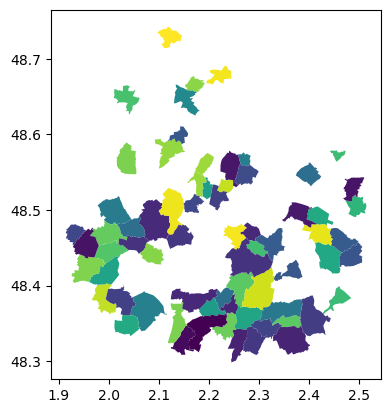

In [242]:
communes_not_in_features.plot(column="insee")

<Axes: >

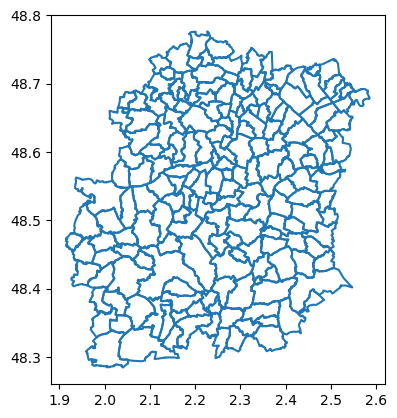

In [243]:
communes_91.boundary.plot()


In [244]:
# load inter

inter = pd.read_csv(
    Path("data/interventions-sdis91.csv"), encoding="ISO-8859-1", sep=";"
)
communes_inter = inter["ope_code_insee"].unique().astype(int)

<Axes: >

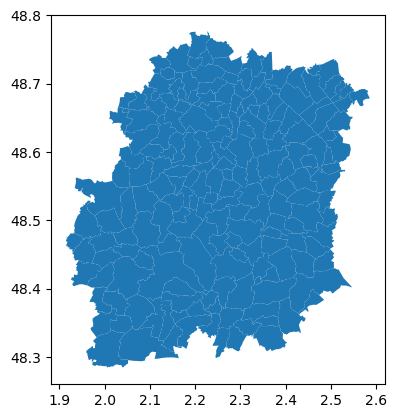

In [245]:
communes_91[communes_91["insee"].isin(communes_inter)].plot()